# Proyecto 
### Valentina Briones M. - Diego Tello - Carlso Valenzuela M.
---

### Limpieza de datos

In [2]:
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression





In [10]:
# Cargamos tablas

cartera = pd.read_excel('./Bases/220610Cartera.xls', sheet_name='Sheet2')
operaciones = pd.read_excel('./Bases/220610Operaciones.xls')
pagos = pd.read_excel('./Bases/220610Pagos.v2.xlsx')
cartera_clasificada = pd.read_excel('./Bases/Cartera Clasificada.v2.xls', sheet_name='Listado')
lineas = pd.read_excel('./Bases/líneas.xls')

sii = pd.read_csv('./Bases/PUB_EMPRESAS_PJ_2020_A_2024.txt' ,sep="\t", encoding='latin-1')

#print(df5)

'''
df1 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right) 

df2 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right)  

df3 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right)  
'''

#df['unique_id'] = df.hh_id.astype(str) + '_' + df.pno.astype(str)



"\ndf1 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right) \n\ndf2 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right)  \n\ndf3 = pd.merge(tabla1,tabla2, how='inner',left_on=left, right_on=right)  \n"

In [11]:
# crear IDs

cartera['id'] = cartera['RUT CLIENTE'].astype(str) + '_' + cartera['Nº DCTO'].astype(str)
cartera['id2'] = cartera['RUT CLIENTE'].astype(str) + cartera['RUT DEUDOR'].astype(str) + cartera['Nº DCTO'].astype(str)

operaciones['id'] = operaciones['Rut Cliente'].astype(str) + '_' + operaciones['Nº Docume.'].astype(str)
sii['id'] = sii['RUT'].astype(str) + '-' + sii['DV'].astype(str)

In [4]:
# Juntamos bases

df1 = pd.merge(cartera,operaciones, how='inner',left_on='id', right_on='id') 
df2 = pd.merge(df1,pagos, how='left',left_on='id2', right_on='ID_2')

df2.drop(['Rut Cliente','Cliente','Ejecutivo','Act.Econó.','Fecha Ces.','Fecha Oto.','Nº Docume.','Doc.','Vcto.Nominal','Monto Dcto.','I.V.A.','Fecha Emisión Dig','Fecha Vto. Real Dig'], axis= 1)

df3 = pd.merge(df2,cartera_clasificada, how='inner',left_on='RUT DEUDOR', right_on='RUT_DV')
df4 = pd.merge(df3,lineas, how='inner',left_on='RUT DEUDOR', right_on='Rut Deudor')
df5 = pd.merge(df4,sii, how='inner',left_on='RUT DEUDOR', right_on='id')
#df2 = pd.merge(df1,pagos, how='inner',left_on='RUR CLIENTE', right_on='Rut Cliente')

df5.to_excel('./Bases/base_final.xlsx', sheet_name='Datos')


### Parte ML

In [3]:
# Cargamos los datos
base_finalv4 = pd.read_excel('./Bases/base_final_V5.xlsx', sheet_name='Datos')

#
base_finalv4.info()

# invoices.drop(['client'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   TIPO DCTO                            7823 non-null   object 
 1   MONTO DOC                            7823 non-null   int64  
 2   Anticipo                             7823 non-null   float64
 3   ESTADO                               7823 non-null   object 
 4   Nº Ope.Cli                           7823 non-null   int64  
 5   Dif.Precio                           7823 non-null   int64  
 6   Tasa Neg.                            7823 non-null   float64
 7   Comisión                             7823 non-null   int64  
 8   Gastos                               7823 non-null   int64  
 9   I.V.A.                               7823 non-null   int64  
 10  Clasificacion                        7823 non-null   object 
 11   Cupo Aprobado                

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Separacion de cat y num 

# Se separa en variables num y cat
df_num = base_finalv4[base_finalv4.columns[base_finalv4.dtypes != "object"]]
df_cat = base_finalv4[base_finalv4.columns[base_finalv4.dtypes == "object"]]

## Escalado
# One Hot
one_hot = OneHotEncoder(sparse=False, drop="first")
one_hot.fit(df_cat)
df_one_hot = pd.DataFrame(one_hot.transform(df_cat), columns=one_hot.get_feature_names_out())
df_one_hot.head()

# Standar
#estand = StandardScaler()
#estand.fit(df_num)
#df_num_std = pd.DataFrame(estand.transform(df_num), columns=estand.get_feature_names_out())
#df_num_std.head()


base_merge = pd.concat([df_num, df_one_hot], axis=1)
base_merge.head()


c:\Users\Carlos\Desktop\Python_intermedio\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MONTO DOC,Anticipo,Nº Ope.Cli,Dif.Precio,Tasa Neg.,Comisión,Gastos,I.V.A.,Cupo Aprobado,Tramo según ventas,...,Comuna_VALPARAISO,Comuna_VICUNA,Comuna_VILCUN,Comuna_VILLA ALEGRE,Comuna_VILLARRICA,Comuna_VINA DEL MAR,Comuna_VITACURA,Comuna_YUMBEL,Comuna_YUNGAY,Comuna_ZAPALLAR
0,29802360,0.98,9,875216,2.9,0,10000,0,60000000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4011491,0.97,8,112065,2.7,300000,0,57000,40000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18265738,0.97,8,510272,2.7,0,0,0,40000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4010895,0.97,8,112048,2.7,0,0,0,40000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1600000,0.98,3,41395,2.4,100000,10000,19000,50000000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
corr = base_merge.corr(method='pearson')
corr.to_excel('./Bases/corr.xlsx', sheet_name='Datos')


In [6]:
# Separamos train y test
# df.loc[df['column_name'] == some_value]
train = base_merge.loc[base_merge['ESTADO_VIGENTE'] == 0]
test = base_merge.loc[base_merge['ESTADO_VIGENTE'] == 1]

# borramos variables estado
train = train.drop(['ESTADO_VIGENTE'], axis=1)
test = test.drop(['ESTADO_VIGENTE'], axis=1)

# Separamos x e y

x_train = train.loc[:, train.columns != 'D_mora']
y_train = train.loc[:, 'D_mora' ]

x_test = test.loc[:, test.columns != 'D_mora']
y_test  = test.loc[:, 'D_mora' ]



# calculate the Pearson's correlation between two variables
'''from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(x_train, x_test)
print('Pearsons correlation: %.3f' % corr)'''


"from numpy.random import randn\nfrom numpy.random import seed\nfrom scipy.stats import pearsonr\n# calculate Pearson's correlation\ncorr, _ = pearsonr(x_train, x_test)\nprint('Pearsons correlation: %.3f' % corr)"

In [6]:

# 2.3 Buscamos hiperparametros optimos con cros_val 

# SVM 
configuraciones = KFold(n_splits=3, shuffle=True, random_state=2022)

modelos_svm = GridSearchCV(
    estimator  = modelo_svm,
    param_grid = hiperparametros_svm,
    cv         = configuraciones,
    scoring    = "roc_auc", # cambiar 
    n_jobs     = -1,
    verbose    = 1
)

modelos_svm.fit(x_train, y_train)

# # DecisionTreeClassifier


modelos_dt = GridSearchCV(
    estimator  = modelo_dtc,          
    param_grid = hiperparametros_dtc, 
    cv         = configuraciones, 
    scoring    = "roc_auc",      
    n_jobs     = -1,              
    verbose    = True               
)

modelos_dt.fit(x_train, y_train)

# Random Forest


modelos_rf = GridSearchCV(
    estimator  = modelo_rf,          
    param_grid = hiperparametros_rf, 
    cv         = configuraciones, 
    scoring    = "roc_auc",      
    n_jobs     = -1,              
    verbose    = 1                
)

modelos_rf.fit(x_train, y_train)

## Resultados parametros y metrica Roc Auc


print("best params svm:", modelos_svm.best_params_)
print("roc auc svm:", modelos_svm.best_score_)


print("best params dt:", modelos_dt.best_params_)
print("roc auc dt:", modelos_dt.best_score_)


print("best params rf:", modelos_rf.best_params_)
print("roc auc rf:", modelos_rf.best_score_)


NameError: name 'KFold' is not defined

In [7]:
# 2.3 Buscamos hiperparametros optimos con cros_val 

# SVM 
configuraciones = KFold(n_splits=3, shuffle=True, random_state=2022)

modelos_svm = GridSearchCV(
    estimator  = modelo_svm,
    param_grid = hiperparametros_svm,
    cv         = configuraciones,
    scoring    = "roc_auc", # cambiar 
    n_jobs     = -1,
    verbose    = 1
)

modelos_svm.fit(x_train, y_train)

## Resultados parametros y metrica Roc Auc


print("best params svm:", modelos_svm.best_params_)
print("roc auc svm:", modelos_svm.best_score_)

NameError: name 'KFold' is not defined

In [8]:
# XGB

XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_predict = XGB.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")





XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")     

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       513
           1       0.55      0.29      0.38       202

    accuracy                           0.73       715
   macro avg       0.66      0.60      0.61       715
weighted avg       0.70      0.73      0.70       715

73.29% Accurate


In [9]:
# LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))




Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")  

# Printing the coefficients
print("intercept ")
print(LR.intercept_)
print("")
print("coefficients ")
print(LR.coef_)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       513
           1       0.90      0.35      0.50       202

    accuracy                           0.80       715
   macro avg       0.85      0.67      0.69       715
weighted avg       0.82      0.80      0.77       715

accuracy is 0.8041958041958042
intercept 
[-6.14707864e-11]

coefficients 
[[-5.74588779e-09 -6.03565418e-11 -7.99423193e-10  2.26162692e-07
  -1.60966354e-10 -2.34887781e-06 -5.88842958e-08 -4.46286994e-07
  -8.93967475e-09 -5.18077905e-10  3.09194637e-07 -3.06947161e-09
  -2.02906466e-11  1.96052493e-12 -2.05909902e-11 -2.61149225e-11
   9.27777713e-13 -1.09965855e-12  4.66522145e-12 -1.11170726e-11
  -8.49456023e-12 -4.04932526e-13  1.16466892e-13  1.59077722e-13
  -7.52919361e-13  5.20576306e-14 -1.26210139e-13 -3.83235323e-12
   4.17265204e-13  2.61374106e-13 -3.80442627e-14 -1.03911561e-11
  -7.45192204e-12 -7.72117898e-14 -7.61963621e-14 -6.38805293e-13
  -2

In [10]:
# 

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")



              precision    recall  f1-score   support

           0       0.75      0.75      0.75       513
           1       0.35      0.35      0.35       202

    accuracy                           0.64       715
   macro avg       0.55      0.55      0.55       715
weighted avg       0.64      0.64      0.64       715

63.64% Accurate


In [11]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       513
           1       0.66      0.23      0.34       202

    accuracy                           0.75       715
   macro avg       0.71      0.59      0.59       715
weighted avg       0.73      0.75      0.70       715

74.83% Accurate


In [12]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'Modelos': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Modelos,Score
3,Logistic Regression,0.804196
1,Random Forest,0.748252
2,XGBoost,0.732867
0,Decision Tree,0.636364


### FE

In [12]:
# data 2 - sacamos campos con poca corr

In [13]:
# Cargamos los datos
base_final_fe = pd.read_excel('./Bases/base_final_V6.xlsx', sheet_name='Datos')

#
base_final_fe.info()

# invoices.drop(['client'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   TIPO DCTO                            7823 non-null   object 
 1   MONTO DOC                            7823 non-null   int64  
 2   Anticipo                             7823 non-null   float64
 3   ESTADO                               7823 non-null   object 
 4   Nº Ope.Cli                           7823 non-null   int64  
 5   Dif.Precio                           7823 non-null   int64  
 6   Tasa Neg.                            7823 non-null   float64
 7   Clasificacion                        7823 non-null   object 
 8    Cupo Aprobado                       7823 non-null   int64  
 9   Tramo según ventas                   7823 non-null   int64  
 10  Número de trabajadores dependientes  7823 non-null   int64  
 11  Subtipo de contribuyente      

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Separacion de cat y num 

# Se separa en variables num y cat
df_num = base_final_fe[base_final_fe.columns[base_final_fe.dtypes != "object"]]
df_cat = base_final_fe[base_final_fe.columns[base_final_fe.dtypes == "object"]]

## Escalado
# One Hot
one_hot = OneHotEncoder(sparse=False, drop="first")
one_hot.fit(df_cat)
df_one_hot = pd.DataFrame(one_hot.transform(df_cat), columns=one_hot.get_feature_names_out())
df_one_hot.head()

# Standar
#estand = StandardScaler()
#estand.fit(df_num)
#df_num_std = pd.DataFrame(estand.transform(df_num), columns=estand.get_feature_names_out())
#df_num_std.head()


base_merge = pd.concat([df_num, df_one_hot], axis=1)
base_merge.head()

#correlation table
corr_table_ante = base_merge.corr()
corr_table_ante_c = corr_table_ante.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_table_ante_c.to_excel('./Bases/corr_table_ante_c.xlsx', sheet_name='Datos')

base_merge = base_merge.drop(['Rubro económico_OTRAS ACTIVIDADES DE SERVICIOS',
'Subtipo de contribuyente_COOPERATIVA',
'Subtipo de contribuyente_SUCESIONES O COMUNIDADES HERED',
'Subtipo de contribuyente_CORPORACION',
'Rubro económico_ADMINISTRACION PUBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACION OBLIGATORIA',
'Región_XVI REGION DE ÑUBLE',
'Región_XIV REGION DE LOS RIOS',
'Subtipo de contribuyente_COMPANIAS DE SEGURO',
'Región_X REGION LOS LAGOS',
'Subtipo de contribuyente_ORG. MINISTERIO DEFENSA',
'Región_IV REGION COQUIMBO',
'Rubro económico_TRANSPORTE Y ALMACENAMIENTO',
'Subtipo de contribuyente_MINISTERIOS',
'Subtipo de contribuyente_OTRAS ORGANIZACIONES SIN P. JURIDICA',
'Región_Sin Información',
'Región_VIII REGION DEL BIO BIO',
'Subtipo de contribuyente_CORPORACION EDUCACIONAL LEY 20845'], axis=1)

c:\Users\Carlos\Desktop\Python_intermedio\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Carlos\AppData\Local\Temp\ipykernel_17336\4013817704.py:28: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_table_ante_c = corr_table_ante.style.background_gradient(cmap='coolwarm').set_precision(2)


In [15]:
corr = base_merge.corr(method='pearson')
corr.to_excel('./Bases/corr2.xlsx', sheet_name='Datos')


<AxesSubplot: >

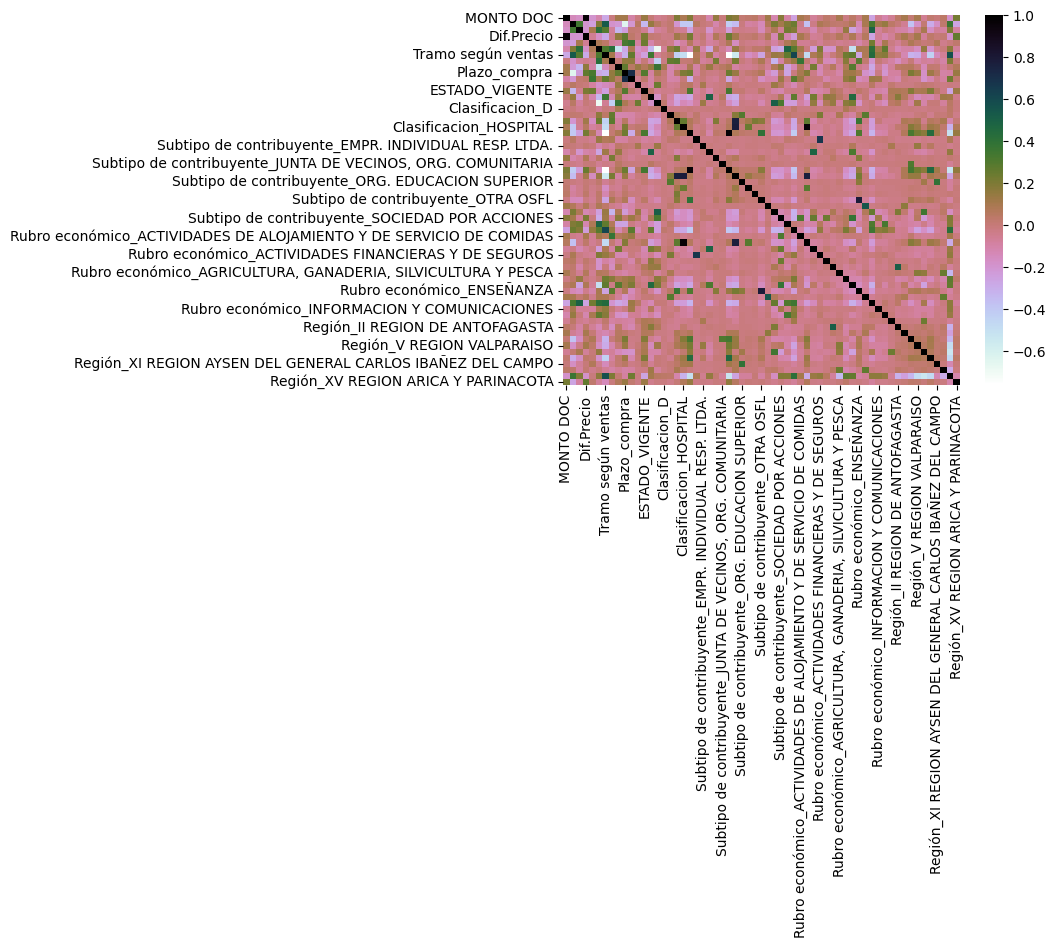

In [16]:
#plotting the correlation matrix
sns.heatmap(corr.corr() ,cmap='cubehelix_r')

In [17]:
#correlation table
corr_table = corr.corr()
corr_table_c = corr_table.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_table_c.to_excel('./Bases/corr_table_c.xlsx', sheet_name='Datos')

C:\Users\Carlos\AppData\Local\Temp\ipykernel_17336\2013433049.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_table_c = corr_table.style.background_gradient(cmap='coolwarm').set_precision(2)


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
# Separamos train y test
# df.loc[df['column_name'] == some_value]
train = base_merge.loc[base_merge['ESTADO_VIGENTE'] == 0]
test = base_merge.loc[base_merge['ESTADO_VIGENTE'] == 1]

# borramos variables estado
train = train.drop(['ESTADO_VIGENTE'], axis=1)
test = test.drop(['ESTADO_VIGENTE'], axis=1)

# Separamos x e y

x_train = train.loc[:, train.columns != 'D_mora']
y_train = train.loc[:, 'D_mora' ]

x_test = test.loc[:, test.columns != 'D_mora']
y_test  = test.loc[:, 'D_mora' ]


In [20]:
# XGB

XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_predict = XGB.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")





XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")     

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       513
           1       0.58      0.28      0.37       202

    accuracy                           0.74       715
   macro avg       0.67      0.60      0.60       715
weighted avg       0.71      0.74      0.70       715

73.85% Accurate


In [21]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
XGB.plot_tree(XGB, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')


AttributeError: 'XGBClassifier' object has no attribute 'plot_tree'

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       513
           1       0.84      0.52      0.64       202

    accuracy                           0.84       715
   macro avg       0.84      0.74      0.77       715
weighted avg       0.84      0.84      0.82       715

accuracy is 0.8363636363636363
intercept 
[-1.74460376e-08]

coefficients 
[[-8.30267427e-09 -1.71296736e-08 -2.26446954e-07  1.89315930e-07
  -4.56986636e-08 -1.04835772e-08 -1.47135829e-07  8.74525729e-05
  -8.72575018e-07 -5.79000588e-09  5.54638919e-10 -5.84130769e-09
  -7.42339389e-09  2.62364783e-10 -3.11330746e-10  1.32319866e-09
  -3.14269023e-09 -2.41063206e-09 -1.14322526e-10 -3.60777569e-11
  -1.08380215e-09  1.18694562e-10  7.38069090e-11 -2.94540674e-09
  -2.10338841e-09 -2.19129949e-11 -1.80352393e-10 -6.50222243e-11
   3.83450568e-10 -4.02888115e-11 -5.11790203e-09 -3.55906070e-09
  -1.94179424e-10 -2.41154006e-09  1.37463984e-09 -2.80427906e-09
   2

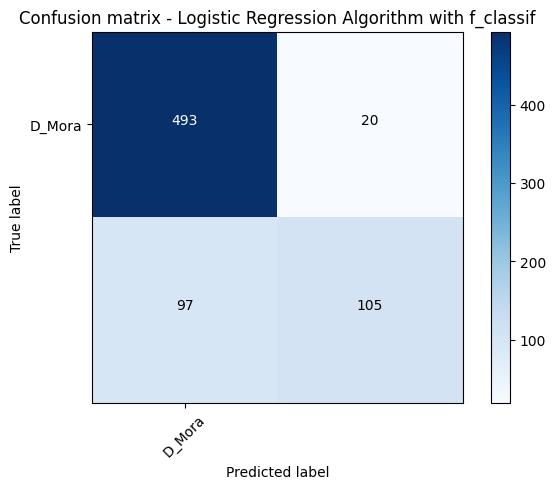

In [22]:
# LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))




Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")  

# Printing the coefficients
print("intercept ")
print(LR.intercept_)
print("")
print("coefficients ")
print(LR.coef_)

from sklearn.metrics import confusion_matrix
import itertools
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["D_Mora"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

In [23]:
# DT

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")


              precision    recall  f1-score   support

           0       0.74      0.69      0.72       513
           1       0.33      0.38      0.35       202

    accuracy                           0.61       715
   macro avg       0.53      0.54      0.53       715
weighted avg       0.62      0.61      0.61       715

60.56% Accurate


In [24]:
from sklearn import tree
import graphviz 
dot_dat = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_dat) 
graph

In [25]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       513
           1       0.66      0.29      0.40       202

    accuracy                           0.76       715
   macro avg       0.71      0.61      0.62       715
weighted avg       0.74      0.76      0.72       715

75.66% Accurate


In [26]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'Modelos': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Modelos,Score
3,Logistic Regression,0.836364
1,Random Forest,0.756643
2,XGBoost,0.738462
0,Decision Tree,0.605594


## More FE

In [27]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

param_grid = [
    {'C': 10**np.linspace(-3,3,20)}
]

lin_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_gridsearch = GridSearchCV(lin_reg, param_grid, cv=10, scoring='accuracy', 
                             refit=True)
lr_gridsearch.fit(x_test, y_test)

print(lr_gridsearch.best_score_)
print(lr_gridsearch.best_params_)



0.8485719874804382
{'C': 0.001}


In [28]:
lr_model = lr_gridsearch.best_estimator_
y_pred_acc = lr_gridsearch.predict(x_test)
print('Training Score:', lr_model.score(x_test, y_test))
confusion_matrix(y_test,y_pred_acc)

Training Score: 0.855944055944056


array([[501,  12],
       [ 91, 111]], dtype=int64)

Confusion matrix, without normalization
[[501  12]
 [ 91 111]]


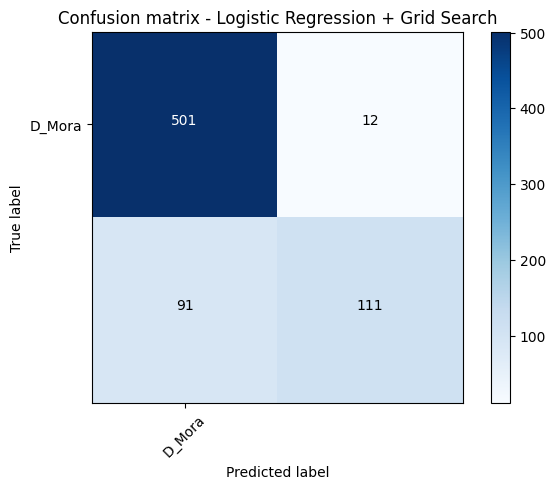

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test,y_pred_acc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["D_Mora"],
title='Confusion matrix - Logistic Regression + Grid Search')

In [30]:
# Printing the coefficients
print("intercept ")
print(lr_model.intercept_)
print("")
print("coefficients ")
print(lr_model.coef_)

x_test.to_excel('./Bases/x_test.xlsx', sheet_name='Datos')


intercept 
[-7.98e-14]

coefficients 
[[-1.67e-09 -2.13e-13 -1.35e-11  1.21e-07 -3.35e-13 -6.15e-09 -3.79e-12
   1.40e-09  3.67e-11  1.03e-13  1.39e-14 -2.40e-13 -1.73e-13  0.00e+00
  -4.89e-15  1.57e-13  1.42e-13  3.20e-13  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  3.28e-13  2.84e-13 -1.15e-15  0.00e+00  0.00e+00
   1.40e-14 -1.18e-15 -2.17e-13  2.11e-14 -8.62e-14 -4.14e-13  2.89e-14
   1.30e-13  4.22e-15  2.54e-15  0.00e+00 -8.38e-14  6.03e-15 -4.14e-14
  -6.46e-14  1.54e-14 -1.63e-14 -3.97e-13 -6.06e-15 -1.29e-15 -2.92e-14
  -4.55e-14 -2.44e-14  1.23e-13  8.21e-14 -7.05e-14 -1.03e-13  2.23e-14
   8.74e-15 -2.22e-13  1.29e-14]]
